In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  
%matplotlib inline

В табличке prices.tsv лежат данные о том как менялась цена на акции из индексов S&P-500, NASDAQ-100 и DJI в течение последних 10 лет. В табличке information.tsv лежит дополнительная полезная информация по каждой из ценных бумаг. Подгрузим эти таблицы и посмотрим на них. 

In [3]:
df_prices = pd.read_csv('price.tsv', sep='\t')
#df_prices.set_index('Date', inplace=True)  
df_prices.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
0,2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.17,17.431229,32.489162,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.59,20.329309,NaN,NaN
1,2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.97,17.490696,32.223312,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.40,20.080635,NaN,NaN
2,2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.50,17.553665,32.497211,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.09,20.089518,NaN,NaN
3,2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.26,17.483702,32.199158,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.35,19.636568,NaN,NaN
4,2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.98,17.690086,32.440819,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.24,19.227848,NaN,NaN


In [4]:
df_inf = pd.read_csv('information.tsv', sep='\t')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [6]:
n_nasdaq = df_inf['NASDAQ'].sum()
n_nasdaq

103

Сколько ценных бумаг входят во все три индекса сразу?

In [8]:
# S&P-500 NASDAQ DJI
n_sp = df_inf[(df_inf['S&P-500'] == True)&(df_inf.NASDAQ == True)&(df_inf.DJI == True)].shape[0]
n_sp

5

В колонке Founded записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)?


In [10]:
n_founded = df_inf[(df_inf.Founded >= 1800)&(df_inf.Founded < 1900)&(df_inf['S&P-500'] == True)].shape[0]
n_founded                                       


95

В колонке GICS Sector находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [11]:
n_sectors = df_inf['GICS Sector'].agg('unique').shape[0]
n_sectors

12

Сколько компаний из индекса S&P-500 в сумме приходится на 3 самых крупных сектора?

In [12]:
n_top3 = df_inf[df_inf['S&P-500'] == True].groupby(['GICS Sector']).Security.count().sort_values()[-3:].sum()
n_top3

210

У скольки компаний тикер (краткое название из колонки Symbol) состоит из трёх букв? 

In [13]:
n_ticker = df_inf[df_inf.Symbol.str.len() == 3].shape[0]
n_ticker

308

А из другого количества букв? 

In [14]:
df_inf['letter_count'] = df_inf.Symbol.str.len()
df_inf.letter_count.value_counts()/df_inf.shape[0]



3    0.586667
4    0.281905
2    0.099048
1    0.019048
5    0.013333
Name: letter_count, dtype: float64

Какая буква встречается на первом месте чаще всего? 

In [19]:
df_inf['first_letter'] = df_inf.Symbol.str[0]
popular_letter = df_inf.first_letter.value_counts().index[0]
popular_letter


'A'

Выберите из вектора 10 случайных тикеров.
Методом .plot постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у .plot() допишите figsize=(12,7), чтобы отрегулировать размер картинки.
Методом .hist() постройте для этих цен гистограммы. Выберите количество бинов bins равное 25, опцию density поставьте в True. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

In [21]:
tickers = df_inf.Symbol.values
tickers10 = np.random.choice(tickers, size = 10, replace = False)
tickers10

array(['PAYX', 'VLO', 'TSLA', 'CTXS', 'ITW', 'CMG', 'LVS', 'HRB', 'APA',
       'GL'], dtype=object)

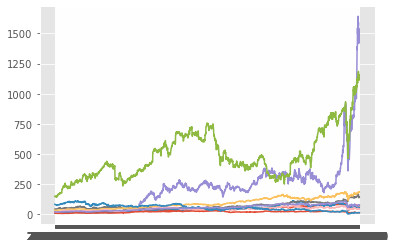

In [22]:
plt.plot(figsize=(12,7))
x = df_prices.Date
for i in range(10):
    plt.plot(x, df_prices[tickers10[i]])

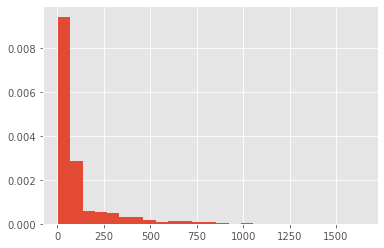

In [23]:
pr = []
for i in range(10):
    pr += list(df_prices[tickers10[i]])
plt.hist(pr, bins = 25, density = True);

Посчитайте для всех компаний среднюю доходность. Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [25]:
df_prices.set_index('Date', inplace=True) 

df_r = df_prices.diff()/df_prices.shift(1)
df_r = df_r.drop(['2010-08-02'])
df_r

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,-0.034004,0.001880,-0.015347,0.000306,NaN,-0.019621,-0.017905,0.003412,-0.008183,-0.016216,...,0.012593,0.008101,-0.017312,NaN,-0.015461,0.006688,-0.006887,-0.012232,NaN,NaN
2010-08-04,0.016164,-0.059099,0.014256,0.004009,NaN,0.012675,-0.042844,0.003600,0.008500,0.019918,...,0.000000,0.017036,0.009327,NaN,0.008698,0.011810,0.025183,0.000442,NaN,NaN
2010-08-05,0.006009,-0.038883,0.009558,-0.004868,NaN,-0.000659,-0.022857,-0.003986,-0.009172,-0.008754,...,-0.000159,-0.002844,-0.010267,NaN,0.015808,-0.006019,0.080456,-0.022547,NaN,NaN
2010-08-06,0.009487,-0.015560,-0.020790,-0.006152,NaN,-0.003296,-0.027291,0.011804,0.007505,-0.007133,...,-0.011801,0.000317,-0.005187,NaN,-0.001179,-0.009541,-0.003624,-0.020814,NaN,NaN
2010-08-09,0.037940,0.025290,0.009668,0.006382,NaN,-0.006283,0.025050,0.006130,0.007450,0.009921,...,0.007746,0.006654,0.016684,NaN,0.007790,0.000186,0.006614,0.009242,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.025947,0.000000,-0.002988,0.023700,0.000515,0.002313,0.019355,0.010510,0.008490,0.015779,...,0.014736,0.004857,0.010863,0.013603,0.002469,0.000969,0.012445,-0.036277,0.023402,0.018721
2020-07-28,-0.020253,0.033363,-0.004359,-0.016427,-0.004632,-0.018173,-0.012458,-0.001300,-0.005105,-0.011073,...,-0.011799,0.001151,-0.038559,-0.012224,-0.006640,-0.000596,-0.007902,-0.004628,-0.000594,-0.006398
2020-07-29,0.018888,-0.031436,0.013818,0.019168,0.003102,0.011752,0.014276,0.026637,0.009902,0.009346,...,0.011022,0.029655,0.042735,0.038068,0.022426,0.040400,0.009846,0.034408,0.000833,0.011029


In [26]:
R = df_r.mean() # средние доходности 
top10 = R.sort_values(ascending=False)[:10]
bot10 = R.sort_values(ascending=False)[-10:]
rtop_10 = sorted(list(top10.index))# list из тикеров 10 самых доходных компаний отсортированный по алфавиту
rbottom_10 = sorted(list(bot10.index))  # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту


Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [27]:

STD  = df_r.std()# стандартные отклонения доходностей

std_top_10 = STD.sort_values()[-10:]
std_bot_10 = STD.sort_values()[:10]
stdtop_10 = sorted(list(std_top_10.index))    # list из тикеров 10 самых доходных компаний отсортированный по алфавиту
stdbottom_10 = sorted(list(std_bot_10.index))  # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту


Сделайте группировку (groupby) для таблицы data по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска?

In [28]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

,std,r,GICS Sector
A,0.018245,0.000808,Health Care
AAL,0.032635,0.000549,Industrials
AAP,0.020001,0.000585,Consumer Discretionary
AAPL,0.017418,0.001179,Information Technology
ABBV,0.018026,0.000873,Health Care


C:\Users\Pavel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


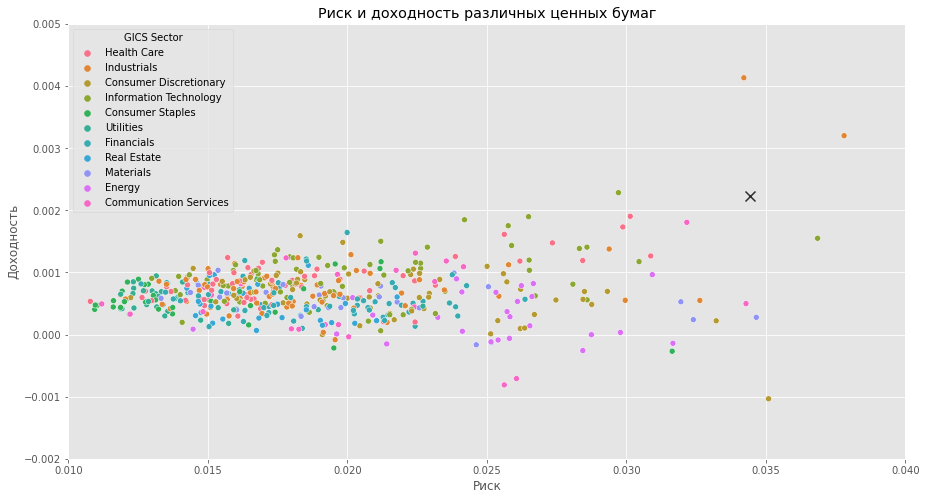

In [29]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot([tsla['std']], [tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Посчитайте 5% VaR по всем ценным бумагам.

In [31]:
df_agg = data.groupby('GICS Sector')[['std', 'r']].median()
min_sector = df_agg[df_agg['std'] == df_agg['std'].min()].index
max_sector = df_agg[df_agg['r'] == df_agg['r'].max()].index


In [32]:


VaR  = df_r.quantile(0.05)  # Value at risk по нашим бумагам
VaRtop_10 = list(VaR.sort_values()[:10].index)     # list из тикеров 10 самых рисковых компаний отсортированный по алфавиту
VaRbottom_10 = list(VaR.sort_values()[-10:].index)   # list из тикеров 10 самых безрисковых компаний отсортированный по алфавиту
VaRtop_10



['TT', 'VIAC', 'MRNA', 'CARR', 'ZM', 'HWM', 'AMD', 'DOCU', 'CTVA', 'TSLA']

Рассчитаете 𝐸𝑆 для Теслы

In [33]:
var_tsla = df_r['TSLA'].quantile(0.05)   # VaR для Теслы
es_tsla  = df_r['TSLA'][df_r['TSLA'] < var_tsla].mean()# ES для теслы